# Introducción

Implementación de Regresión Lineal: Una Guía Paso a Paso
Introducción Este documento detalla el proceso de implementación de un modelo de regresión lineal simple. La regresión lineal es una técnica estadística utilizada para modelar la relación entre una variable dependiente (y) y una o más variables independientes (X).

# Pasos a Seguir

1. Definición de Funciones:

    * Funcion de graficación: Función de Graficación: Visualiza los datos en un diagrama de dispersión para identificar patrones y tendencias.
    * Función de Escalado: Normaliza los datos restando la media y dividiendo por la desviación estándar para mejorar el rendimiento del algoritmo de optimización.
    * Función del Modelo Lineal: Define la ecuación del modelo lineal: y = mx + b, donde m es la pendiente y b es la intersección con el eje y.
    * Función de Costo: Calcula el error cuadrático medio (MSE) entre las predicciones del modelo y los valores reales.
    * Función de Gradiente: Calcula la derivada parcial de la función de costo con respecto a los parámetros (m y b), necesaria para el descenso del gradiente.

2. Carga de Datos:

    * Carga los datos desde un archivo (CSV, Excel, etc.) en formato numérico.
    * Separa los datos en características (X) y etiquetas (y).

3. Escalado de Datos:
   * Aplica la funcion de escalado a las caracteristicas (X).

4. Inicializacion de Parémetros:

    * Inicializa aleatoriamente los valores de la pendiente (m) y la intersección (b)

5. Definición de Hyperparametros:

    * Establece el valor del coeficiente de aprendizaje (alpha) que contro el tamaño de los pasos en el descenso del gradiente.

6. Definicion de hiperparámetros:
    
    * Establece el valor del coeficiente de aprendizaje (alpha) que contro el tamaño de los pasos en el descenso del gradiente.

    * Define el número maximo de iteraciones

6. Entrenamiento del gradiente: Repite los siguinetes pasos durante un número máximo de iteraciones
    * Calculas la prediccion del modelo.
    * Calculo el error utilizando la funcion de costo
    * Actualiza los parametros utilizando la siguinete formula:
         m = m - alpha * gradiente_m
         b = b - alpha * gradiente_b

8. Monitoreo del Error:

    * Grafica el error de entrenamiento en cada iteración para visualizar la convergencia del modelo.

9. Predicción: 

* Utiliza el modelo entrenado para realizar predicciones sobre nuevos datos.
* Escalado: Si los nuevos datos no han sido escalados, es necesario aplicar el mismo escalado utilizado durante el entrenamiento.

 
10. Evaluación del Modelo:
Calcula métricas como el error cuadrático medio (MSE), la raíz cuadrada del error cuadrático medio (RMSE) y el coeficiente de determinación (R²) para evaluar el rendimiento del modelo.   
Visualización:

Grafica las predicciones del modelo junto con los datos reales para visualizar el ajuste del modelo.
Consideraciones Adicionales:


La regresion lineal por el modelo de regularizacion se estara implementando en el proximo codigo.

In [2]:
# Se importan las librerias  
import numpy as np 
import matplotlib.pyplot as plt 
import math

# Definición de Funciones

In [4]:
#Funcion para graficar cada una de las caracteristias (feactures) con la variable y o target. 
#Entradas: 
#    n      :Número total de caracteristicas en el dataset  
#    x[i,j] :Matriz de características con dimensiones (m,n), donde m es el número de muestras y n el número de características.
#    y[i]   :Vector de la variable objetivo con dimensión (m,). 
#salida: 
#    Una figura con n subplots, cada uno mostrando la relación entre una característica y la variable objetivo.  
#"""
def plot_datos(n,x,y):
    u = 1
    o = 4
    fig,ax = plt.subplots(u,o,figsize=(12,3),sharey=True)

    for j in range(n):
        ax[j].scatter(x[:,j],y,s=30,c='r',marker='o')
        ax[j].set_xlabel(f'x[{j}]')
        ax[j].set_ylabel('y')
    plt.show()
#"""

In [6]:
#funcion que realiza el escalado de funciones. Los datos deben ser ingresados en 2D, en el caso de que sean
#vectores se aconceja que se rescalen a (m,1) para las dos variables 

#Entradas: 
#    n     : Número total de caracteristicas en el dataset  
#    x[i,j]: Matriz de características (m, n).
#Salidas: 
#    x[i,j]:  Matriz de características escaladas.
#    media: parametro de la media de los datos con las que fue entrenado 
#    desv: desviacion estandar con la que fue entrenado 
#"""
def scaling_features(n,x):
    media = np.mean(x,axis=0) # Se calcula la media de cada una de las caracteristicas 
    desv  = np.std(x,axis=0)  # Se calcula la desviasion estandar de cada una de las variables 
    for j in range(n):
        x[:,j] = (x[:,j] - media[j])/desv[j]

    return x, media, desv
#"""

In [8]:
#"""
#funcion de hypotesis o modelo. 
# forward propagation 
#entradas: 
#    w -> vector de parametros 
#    [w0, w1, w2, ... wn] -> vector(n)
#    b -> valor escalar 
#
#    x -> entradas de los datos o vector de la matriz 
#    [x11, x12 , ....  X1n
#     X21, X22, .......X2n
#           ...
#           ...
#           ...
#     Xm1, Xm2, ...... Xmn]
#        matriz (m,n)
#    Salidas:
#        model f_wb(x) = x*w^T + b
#        f_wb = [f_wb1 f_wb2 ... f_wbm ] -> vector (m)
#"""
def forward(x,b,w):
    """
    calculo la salida del modelo lineal para un conjunto de datos 

    Args: 
        x: Matriz de caracteristicas (m,n) 
        b: valor de intercepción escalar 
        w: Vector de peros (n,)
    Returns: 
        f_wb: Vector de predicciones del modelo (m,)
    """
    f_wb = x @ w + b
    return f_wb

In [10]:
'''# funcion de coste
entradas:
      m -> numero de filas
      f_wb -> vector que representa las prediccion del modelo con los parametros dados
              vector (m,1)
      yi   -> valor de verdad de los datos o target
              vector (m,1)
salida:
      cost -> funcion de costo '''

def cost_fuction(m,f_wb,yi):
    '''
    Calcula la funcion de costo. 
    Args: 
        f_wb: valores de predicción (m,)
        yi: Tipo de funcion de costo (mse erro cuadratico medio)
    Returns 
        Cost:Valor de la funcion de costo 
    '''
    dif = (f_wb - yi)**2
    suma = np.sum(dif)
    cost = suma/(2*m)
    return cost

In [17]:
#'''
# calculo del gradiente de error
#entradas:
#  m    -> numero de datos de entrenamiento  escalar
#  n    -> numero de caracteristicas
#  f_wb -> vector de predicciones con w y x  vector(m,1)
#  yi   -> Target o valores verdaderos    vector (m,1)
#  xi    -> datos de entrenamiento matriz (m,n)

#salida:
#  d_dw -> vector de gradiente del parametro w vector(1,n)
#  d_db -> escalar del gradiente del parametro b escalar
#'''
def gradiente(m,n,f_wb,yi,xi):
    """
    Calcula el gradiente de la funcion de costo.

    Args: 
        X: Matriz de caracteristicas (m,n). 
        yi: Valores reales (m,)
        f_wb: predicciones del modelo (m,)
    Returns: 
        dw: gradiente de los pesos (n,)
        db: gradiente del sesgo
    """
    d_dw = np.zeros(n)
  #
    dif = f_wb-yi
    d_dw=np.dot(xi.T,dif)
  #
    d_db = np.sum(dif)/m
    d_dw = d_dw/m
  #
    return d_dw,d_db

# Carga de Datos

In [20]:
#x = np.array([121, 123, 108, 108, 111, 109, 114, 103, 110, 115])
#y = np.array([25, 22, 19, 24, 19, 18, 20, 15, 20, 21])

x = np.array([[2104, 5 , 1 , 45], [1416, 3, 2, 40],[852, 2, 1, 35]])
y = np.array([460 , 232, 178])

# tamaño de los datos 
dimension = x.ndim
if dimension<2:
    m = len(x)
    n = 1
else: 
    m,n = x.shape

print(f'Tamaño de los datos: {(m,n)}')

Tamaño de los datos: (3, 4)


# Escalado de Datos

In [22]:
x = np.array(x,dtype=np.float32).reshape(m,n)
y = np.array(y,dtype=np.float32).reshape(m)

# Codigo Principal
print('tamaño de los datos de x')
print(x.shape)
print('')
print('tamaño de los de y')
print(y.shape)

tamaño de los datos de x
(3, 4)

tamaño de los de y
(3,)


In [24]:
# Reescaldo de los datos x, media, desv = scaling_features(n,x):
X_train = x.copy() 
Y_train = y.copy()

X_train,media,desv = scaling_features(n,X_train)
print('Datos escalados')
print(X_train)

Datos escalados
[[ 1.263115    1.3363062  -0.7071069   1.2247449 ]
 [-0.08073527 -0.26726115  1.4142135   0.        ]
 [-1.18238    -1.0690448  -0.7071069  -1.2247449 ]]


# Graficar los datos obtenidos 

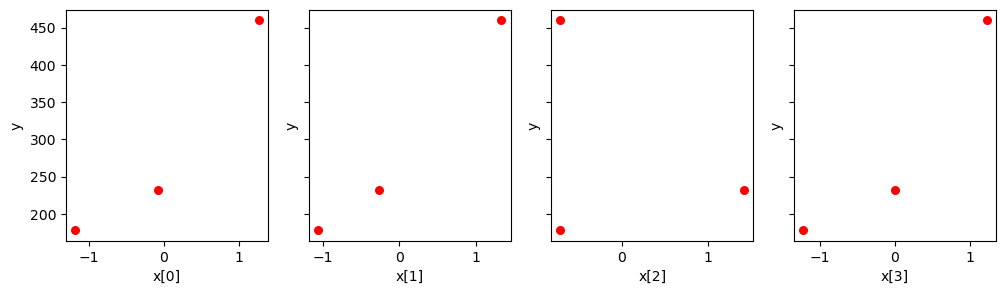

In [26]:
# grafica de los datos plot_datos(n,x,y):
plot_datos(n,X_train,Y_train)

# Inicializacion de Parémetros

In [31]:
# Crear los parametros w y b
np.random.seed()
w = np.random.rand(n)
b = np.random.rand(1)

# mostrar los parametros
print(f'w: {w}')
print(f'b: {b}')

w: [0.97275279 0.00541527 0.67874355 0.67521857]
b: [0.32408133]


# Definicion de hiperparámetros
# Entrenamiento del gradiente

In [33]:
# iteracion para la actualizacion de parametros 
# Entrenamiento 
z = 1000 # numero de iteraciones 
alpha = 2.0e-2 # coeficiente de entrenamiento 
# 
J = [] # historico del coste 
print('Inicio del entrenamiento')
for i in range(z):
  f_wb=forward(X_train,b,w) # forward propagation

  d_dw,d_db=gradiente(m,n,f_wb,Y_train,X_train) # calculo de los gradientes

  temp_w = w - alpha * d_dw # Actualizacion
  temp_b = b - alpha * d_db

  w = temp_w
  b = temp_b

  # Calculo del costo
  if i<100000:
    cost = cost_fuction(m,f_wb,Y_train)
    J.append(cost)

  ## print cost everi at
  if i% math.ceil(z/10)==0:
    print(f"Iteration {i:4}: Cost {J[-1]:0.2e} ",
                  f"dj_dw: {np.round(d_dw,2)}, dj_db: {np.round(d_db,2)}  ",
                  f"w: {np.round(w,2)}, b:{np.round(b)}")

Inicio del entrenamiento
Iteration    0: Cost 4.93e+04  dj_dw: [-115.67 -119.3    41.63 -113.47], dj_db: -289.68   w: [ 3.29  2.39 -0.15  2.94], b:[6.]
Iteration  100: Cost 7.44e+02  dj_dw: [-0.01 -0.48  3.56  0.19], dj_db: -38.42   w: [ 38.6   40.77 -27.61  36.75], b:[252.]
Iteration  200: Cost 1.31e+01  dj_dw: [ 0.03 -0.03  0.46  0.06], dj_db: -5.09   w: [ 38.48  41.05 -30.61  36.45], b:[285.]
Iteration  300: Cost 2.30e-01  dj_dw: [ 0.   -0.    0.06  0.01], dj_db: -0.68   w: [ 38.45  41.08 -31.    36.41], b:[289.]
Iteration  400: Cost 4.05e-03  dj_dw: [ 0.   -0.    0.01  0.  ], dj_db: -0.09   w: [ 38.45  41.08 -31.05  36.4 ], b:[290.]
Iteration  500: Cost 7.11e-05  dj_dw: [ 0. -0.  0.  0.], dj_db: -0.01   w: [ 38.45  41.08 -31.05  36.4 ], b:[290.]
Iteration  600: Cost 1.25e-06  dj_dw: [ 0. -0.  0.  0.], dj_db: -0.0   w: [ 38.45  41.08 -31.05  36.4 ], b:[290.]
Iteration  700: Cost 2.20e-08  dj_dw: [ 0. -0.  0.  0.], dj_db: -0.0   w: [ 38.45  41.08 -31.05  36.4 ], b:[290.]
Iteration  8

# Monitoreo del Error

(-2.0, 200.0)

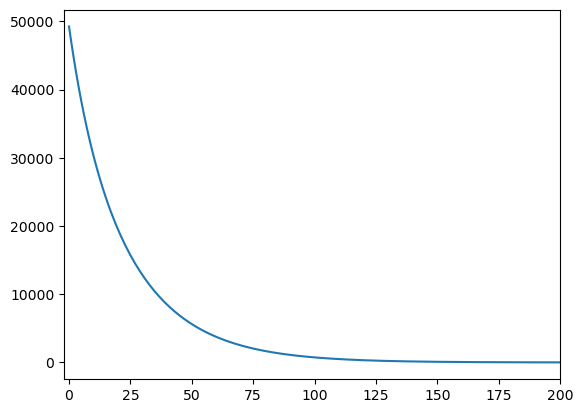

In [35]:
plt.plot(J)
plt.xlim([-2,200])

In [37]:
print(f'w:{w}')
print(f'b:{b}')

w:[ 38.44908658  41.08161838 -31.05349894  36.39828829]
b:[289.99999617]


# Predicción

In [39]:
# X predicion escalar la variable 
#
X_p = x.copy()

for j in range(n):
        X_p[:,j] = (x[:,j] - media[j])/desv[j]
# 
f_predict = forward(X_p,b,w)

# comparacion 
comparacion = np.c_[f_predict,y]

# mostrar resultados 
print(comparacion)

[[459.99999949 460.        ]
 [231.99999957 232.        ]
 [177.99999948 178.        ]]


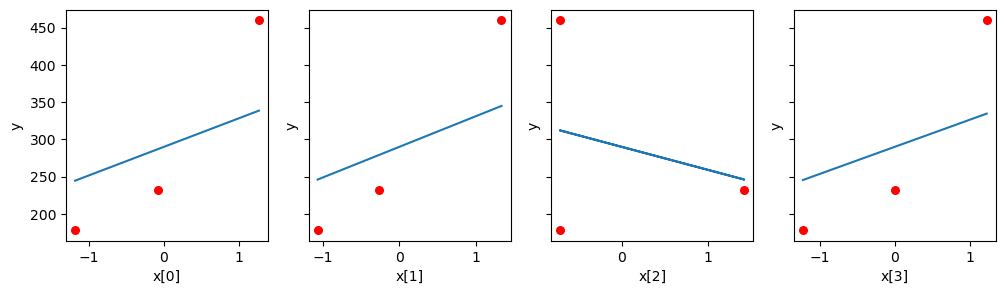

In [41]:
# Graficar 
fwb = x.copy()
fwb.shape
#
fig,ax = plt.subplots(1,4,figsize=(12,3),sharey=True)
# 
for j in range(n):
    fwb[:,j] = w[j]*X_p[:,j] + b
    # grafica
    ax[j].plot(X_p[:,j],fwb[:,j])
    ax[j].scatter(X_p[:,j],Y_train,s=30,c='r',marker='o')
    ax[j].set_xlabel(f'x[{j}]')
    ax[j].set_ylabel('y')
plt.show()